Assignment: Ionosphere Data Problem
Dataset Description:
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

Attribute Information:
All 34 are continuous
The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.




Data Set Characteristics:  

Multivariate

Number of Instances:

351

Area:

Physical

Attribute Characteristics:

Integer,Real

Number of Attributes:

34

Date Donated

N/A

Associated Tasks:

Classification

Missing Values?

N/A

Number of Web Hits:

N/A

WORKFLOW :
Load Data
Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
Shuffle the data if needed.
Standardized the Input Variables. Hint: Centeralized the data
Split into 60 and 40 ratio.
Encode labels.
Model : 1 hidden layers including 16 unit.
Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
Train the Model with Epochs (100).
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 92%
Evaluation Step
Prediction

In [2081]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2082]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BC9B-4E79

 Directory of C:\Users\User\Downloads\Inospher

04/09/2021  09:56 PM    <DIR>          .
04/09/2021  09:56 PM    <DIR>          ..
04/09/2021  07:55 PM    <DIR>          .ipynb_checkpoints
04/09/2021  09:56 PM           962,959 Ionospher 2 .ipynb
04/09/2021  08:26 PM           991,918 Ionosphere.ipynb
04/07/2021  09:43 PM            76,038 ionosphere_data.csv
04/09/2021  11:39 AM           725,399 Untitled.ipynb
               4 File(s)      2,756,314 bytes
               3 Dir(s)  211,461,943,296 bytes free


In [2083]:
dfiono = pd.read_csv('ionosphere_data.csv')

In [2084]:
dfiono.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

In [2085]:
dfiono.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [2086]:
dfiono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [2087]:
dfiono.label.unique()

array(['g', 'b'], dtype=object)

In [2088]:
pd.options.display.max_columns = 35

In [2089]:
dfiono.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2090]:
dfiono.drop('feature2', axis = 1, inplace = True)

array([[<AxesSubplot:title={'center':'feature1'}>,
        <AxesSubplot:title={'center':'feature3'}>,
        <AxesSubplot:title={'center':'feature4'}>,
        <AxesSubplot:title={'center':'feature5'}>,
        <AxesSubplot:title={'center':'feature6'}>,
        <AxesSubplot:title={'center':'feature7'}>],
       [<AxesSubplot:title={'center':'feature8'}>,
        <AxesSubplot:title={'center':'feature9'}>,
        <AxesSubplot:title={'center':'feature10'}>,
        <AxesSubplot:title={'center':'feature11'}>,
        <AxesSubplot:title={'center':'feature12'}>,
        <AxesSubplot:title={'center':'feature13'}>],
       [<AxesSubplot:title={'center':'feature14'}>,
        <AxesSubplot:title={'center':'feature15'}>,
        <AxesSubplot:title={'center':'feature16'}>,
        <AxesSubplot:title={'center':'feature17'}>,
        <AxesSubplot:title={'center':'feature18'}>,
        <AxesSubplot:title={'center':'feature19'}>],
       [<AxesSubplot:title={'center':'feature20'}>,
        <AxesSubp

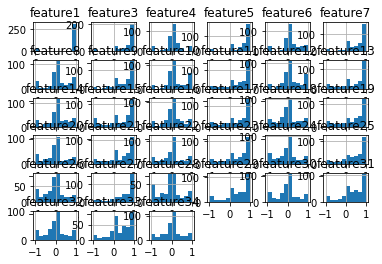

In [2091]:
dfiono.hist()

In [2092]:
from sklearn.preprocessing import LabelEncoder 

In [2093]:
labelencoder = LabelEncoder()

In [2094]:
dfiono.label = labelencoder.fit_transform(dfiono.label)

In [2095]:
dfiono.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2096]:
import seaborn as sns

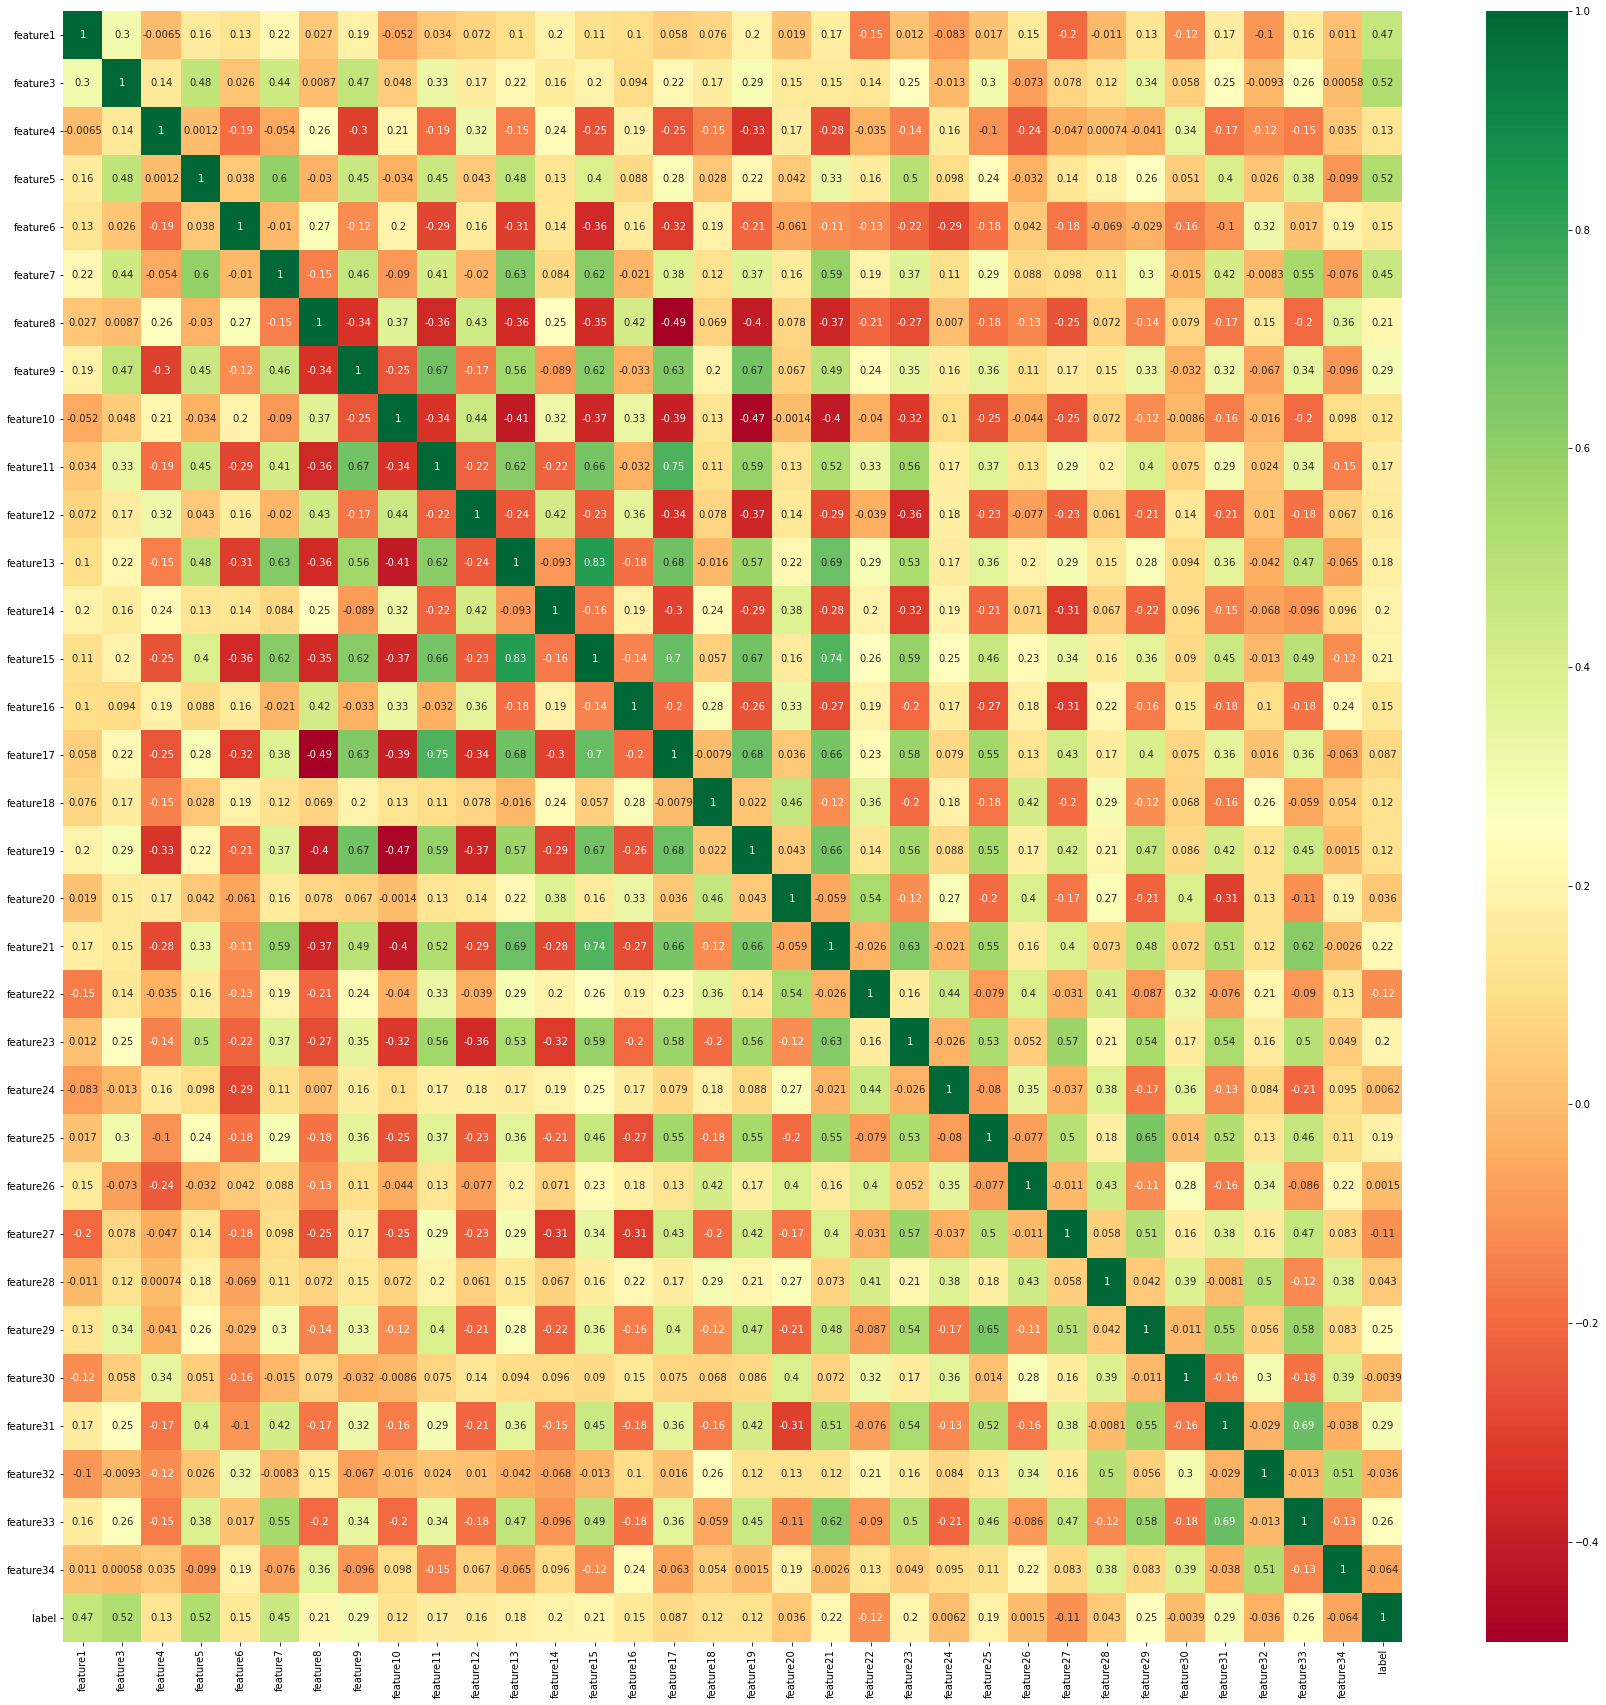

In [2097]:
corrmat = dfiono.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (30, 30))
g = sns.heatmap(dfiono[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [2098]:
iono_label = dfiono.label.values

In [2099]:
iono_features = dfiono.drop('label', axis = 1).values

In [2100]:
iono_features

array([[ 1.0000e+00,  9.9539e-01, -5.8890e-02, ..., -5.4487e-01,
         1.8641e-01, -4.5300e-01],
       [ 1.0000e+00,  1.0000e+00, -1.8829e-01, ..., -6.2880e-02,
        -1.3738e-01, -2.4470e-02],
       [ 1.0000e+00,  1.0000e+00, -3.3650e-02, ..., -2.4180e-01,
         5.6045e-01, -3.8238e-01],
       ...,
       [ 1.0000e+00,  9.4701e-01, -3.4000e-04, ...,  4.4200e-03,
         9.2697e-01, -5.7700e-03],
       [ 1.0000e+00,  9.0608e-01, -1.6570e-02, ..., -3.7570e-02,
         8.7403e-01, -1.6243e-01],
       [ 1.0000e+00,  8.4710e-01,  1.3533e-01, ..., -6.6780e-02,
         8.5764e-01, -6.1510e-02]])

In [2101]:
from sklearn.model_selection import train_test_split

In [2102]:
features_trainval, features_test, label_trainval, label_test = train_test_split(iono_features, iono_label, test_size=0.4, random_state=42)

In [2103]:
print(features_trainval.shape);
print(features_test.shape);
print(label_trainval.shape);
print(label_test.shape)

(210, 33)
(141, 33)
(210,)
(141,)


In [2104]:
from sklearn import preprocessing

In [2105]:
standard_scaler = preprocessing.StandardScaler()
features_trainval_scaled = standard_scaler.fit_transform(features_trainval)

#min_max_scaler = preprocessing.MinMaxScaler()
#features_trainval_scaled = min_max_scaler.fit_transform(features_trainval)

In [2106]:
features_trainval_scaled.mean(axis = 0)

array([-9.51619735e-17, -5.78373328e-16, -2.77555756e-18,  4.83211355e-16,
       -9.67480064e-17,  4.72637802e-16,  2.11471052e-17,  4.07081776e-16,
       -1.99047128e-16,  8.40597433e-17,  1.55959901e-17, -1.78164362e-16,
        9.25185854e-17,  1.12079658e-16,  1.32169408e-19, -1.71291552e-16,
        1.03092138e-17, -1.45386348e-16,  2.93416085e-17, -3.38353684e-17,
        1.60255407e-17,  1.48029737e-17,  7.99624917e-18, -1.69705519e-16,
       -5.94762335e-17, -4.64707637e-16,  6.55560262e-17,  2.13057085e-16,
        1.06330288e-16,  7.61295788e-17, -1.23908820e-17, -1.68648164e-16,
        1.62568371e-17])

In [2107]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [2108]:
from tensorflow.keras import regularizers

In [2109]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(33,)))
    #model.add(layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation='relu', input_shape=(33,)))
    #model.add(layers.Dropout(0.05))
    model.add(layers.Dense(8, activation='relu'))    
    #model.add(layers.Dense(8, kernel_regularizer = regularizers.l1(0.001), activation='relu'))
    #model.add(layers.Dropout(0.05))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam') #rmsprop
    return model

In [2110]:
model.summary()

Model: "sequential_494"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1495 (Dense)           (None, 16)                544       
_________________________________________________________________
dense_1496 (Dense)           (None, 8)                 136       
_________________________________________________________________
dense_1497 (Dense)           (None, 1)                 9         
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


In [2111]:
from sklearn.model_selection import RepeatedKFold

In [2112]:
#kf = KFold(n_splits=3)
rkf = RepeatedKFold(n_splits=6, n_repeats=3)

In [2113]:
all_scores_loss = []
all_scores_accuracy = []

In [2114]:
def history_plot(history_dict):
    plt.plot(history_dict['loss'])
    plt.plot(history_dict['accuracy'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Loss', 'Accuracy'])
    plt.show()

Epoch 1/20
175/175 [==============================] - 0s 439us/step - loss: 0.5977 - accuracy: 0.7257
Epoch 2/20
175/175 [==============================] - 0s 425us/step - loss: 0.4358 - accuracy: 0.8571
Epoch 3/20
175/175 [==============================] - 0s 462us/step - loss: 0.3459 - accuracy: 0.8857
Epoch 4/20
175/175 [==============================] - 0s 423us/step - loss: 0.2880 - accuracy: 0.8914
Epoch 5/20
175/175 [==============================] - 0s 426us/step - loss: 0.2456 - accuracy: 0.9086
Epoch 6/20
175/175 [==============================] - 0s 426us/step - loss: 0.2168 - accuracy: 0.9143
Epoch 7/20
175/175 [==============================] - 0s 447us/step - loss: 0.1894 - accuracy: 0.9371
Epoch 8/20
175/175 [==============================] - 0s 458us/step - loss: 0.1695 - accuracy: 0.9429
Epoch 9/20
175/175 [==============================] - 0s 410us/step - loss: 0.1509 - accuracy: 0.9486
Epoch 10/20
175/175 [==============================] - 0s 424us/step - loss: 0.136

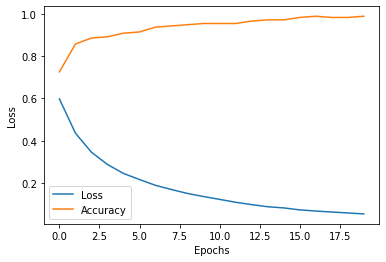

2/2 [==============================] - 0s 0s/step - loss: 0.1943 - accuracy: 0.8857
Epoch 1/20
175/175 [==============================] - 0s 434us/step - loss: 0.7381 - accuracy: 0.6171
Epoch 2/20
175/175 [==============================] - 0s 412us/step - loss: 0.4721 - accuracy: 0.8686
Epoch 3/20
175/175 [==============================] - 0s 413us/step - loss: 0.3437 - accuracy: 0.9200
Epoch 4/20
175/175 [==============================] - 0s 406us/step - loss: 0.2630 - accuracy: 0.9257
Epoch 5/20
175/175 [==============================] - 0s 417us/step - loss: 0.2100 - accuracy: 0.9314
Epoch 6/20
175/175 [==============================] - 0s 398us/step - loss: 0.1733 - accuracy: 0.9371
Epoch 7/20
175/175 [==============================] - 0s 401us/step - loss: 0.1453 - accuracy: 0.9486
Epoch 8/20
175/175 [==============================] - 0s 413us/step - loss: 0.1244 - accuracy: 0.9600
Epoch 9/20
175/175 [==============================] - 0s 404us/step - loss: 0.1047 - accuracy: 0.965

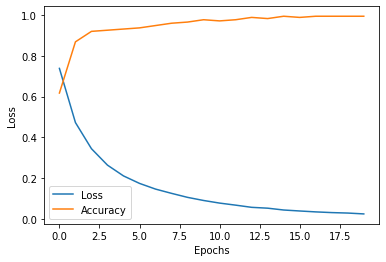

2/2 [==============================] - 0s 0s/step - loss: 0.6689 - accuracy: 0.8000
Epoch 1/20
175/175 [==============================] - 0s 514us/step - loss: 0.6546 - accuracy: 0.6914
Epoch 2/20
175/175 [==============================] - 0s 406us/step - loss: 0.5269 - accuracy: 0.8000
Epoch 3/20
175/175 [==============================] - 0s 395us/step - loss: 0.4264 - accuracy: 0.8457
Epoch 4/20
175/175 [==============================] - 0s 413us/step - loss: 0.3540 - accuracy: 0.9029
Epoch 5/20
175/175 [==============================] - 0s 394us/step - loss: 0.2964 - accuracy: 0.9143
Epoch 6/20
175/175 [==============================] - 0s 409us/step - loss: 0.2432 - accuracy: 0.9200
Epoch 7/20
175/175 [==============================] - 0s 393us/step - loss: 0.2009 - accuracy: 0.9429
Epoch 8/20
175/175 [==============================] - 0s 393us/step - loss: 0.1691 - accuracy: 0.9543
Epoch 9/20
175/175 [==============================] - 0s 402us/step - loss: 0.1428 - accuracy: 0.954

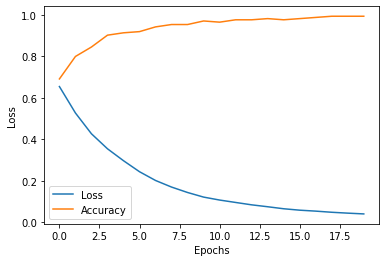

2/2 [==============================] - 0s 0s/step - loss: 0.4280 - accuracy: 0.8857
Epoch 1/20
175/175 [==============================] - 0s 450us/step - loss: 0.6832 - accuracy: 0.6343
Epoch 2/20
175/175 [==============================] - 0s 418us/step - loss: 0.4905 - accuracy: 0.8400
Epoch 3/20
175/175 [==============================] - 0s 420us/step - loss: 0.3783 - accuracy: 0.8629
Epoch 4/20
175/175 [==============================] - 0s 404us/step - loss: 0.3089 - accuracy: 0.9029
Epoch 5/20
175/175 [==============================] - 0s 427us/step - loss: 0.2570 - accuracy: 0.8971
Epoch 6/20
175/175 [==============================] - 0s 473us/step - loss: 0.2222 - accuracy: 0.9143
Epoch 7/20
175/175 [==============================] - 0s 507us/step - loss: 0.1921 - accuracy: 0.9257
Epoch 8/20
175/175 [==============================] - 0s 485us/step - loss: 0.1655 - accuracy: 0.9429
Epoch 9/20
175/175 [==============================] - 0s 484us/step - loss: 0.1427 - accuracy: 0.937

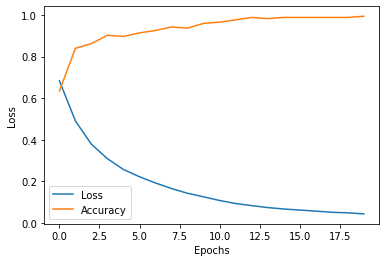

2/2 [==============================] - 0s 0s/step - loss: 0.4691 - accuracy: 0.8286
Epoch 1/20
175/175 [==============================] - 0s 414us/step - loss: 0.5733 - accuracy: 0.7829
Epoch 2/20
175/175 [==============================] - 0s 416us/step - loss: 0.4148 - accuracy: 0.8743
Epoch 3/20
175/175 [==============================] - 0s 397us/step - loss: 0.3086 - accuracy: 0.8857
Epoch 4/20
175/175 [==============================] - 0s 427us/step - loss: 0.2501 - accuracy: 0.8971
Epoch 5/20
175/175 [==============================] - 0s 389us/step - loss: 0.2147 - accuracy: 0.9200
Epoch 6/20
175/175 [==============================] - 0s 403us/step - loss: 0.1910 - accuracy: 0.9200
Epoch 7/20
175/175 [==============================] - 0s 406us/step - loss: 0.1706 - accuracy: 0.9371
Epoch 8/20
175/175 [==============================] - 0s 393us/step - loss: 0.1555 - accuracy: 0.9429
Epoch 9/20
175/175 [==============================] - 0s 404us/step - loss: 0.1398 - accuracy: 0.948

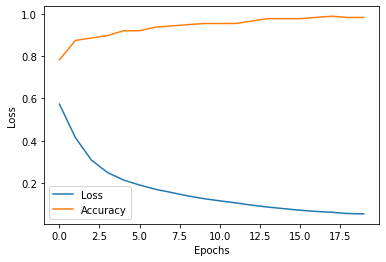

2/2 [==============================] - 0s 477us/step - loss: 0.2291 - accuracy: 0.9143
Epoch 1/20
175/175 [==============================] - 0s 452us/step - loss: 0.6775 - accuracy: 0.6286
Epoch 2/20
175/175 [==============================] - 0s 419us/step - loss: 0.5310 - accuracy: 0.8171
Epoch 3/20
175/175 [==============================] - 0s 400us/step - loss: 0.4184 - accuracy: 0.8857
Epoch 4/20
175/175 [==============================] - 0s 399us/step - loss: 0.3290 - accuracy: 0.8971
Epoch 5/20
175/175 [==============================] - 0s 401us/step - loss: 0.2627 - accuracy: 0.9200
Epoch 6/20
175/175 [==============================] - 0s 412us/step - loss: 0.2087 - accuracy: 0.9429
Epoch 7/20
175/175 [==============================] - 0s 397us/step - loss: 0.1668 - accuracy: 0.9543
Epoch 8/20
175/175 [==============================] - 0s 401us/step - loss: 0.1402 - accuracy: 0.9600
Epoch 9/20
175/175 [==============================] - 0s 404us/step - loss: 0.1232 - accuracy: 0.

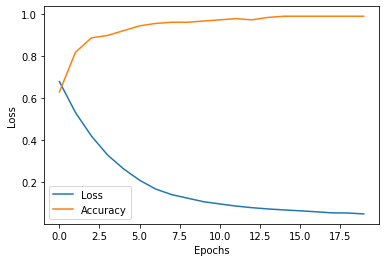

2/2 [==============================] - 0s 661us/step - loss: 0.5087 - accuracy: 0.8571
Epoch 1/20
175/175 [==============================] - 0s 439us/step - loss: 0.6543 - accuracy: 0.6914
Epoch 2/20
175/175 [==============================] - 0s 399us/step - loss: 0.4634 - accuracy: 0.8229
Epoch 3/20
175/175 [==============================] - 0s 416us/step - loss: 0.3564 - accuracy: 0.8457
Epoch 4/20
175/175 [==============================] - 0s 405us/step - loss: 0.2881 - accuracy: 0.8800
Epoch 5/20
175/175 [==============================] - 0s 399us/step - loss: 0.2444 - accuracy: 0.9029
Epoch 6/20
175/175 [==============================] - 0s 427us/step - loss: 0.2046 - accuracy: 0.9314
Epoch 7/20
175/175 [==============================] - 0s 410us/step - loss: 0.1743 - accuracy: 0.9314
Epoch 8/20
175/175 [==============================] - 0s 416us/step - loss: 0.1467 - accuracy: 0.9486
Epoch 9/20
175/175 [==============================] - 0s 407us/step - loss: 0.1263 - accuracy: 0.

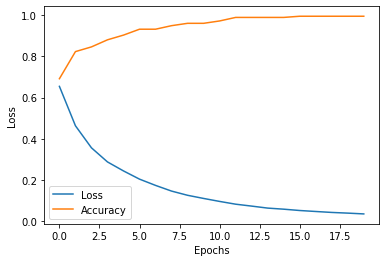

2/2 [==============================] - 0s 499us/step - loss: 0.1589 - accuracy: 0.9429
Epoch 1/20
175/175 [==============================] - 0s 458us/step - loss: 0.6163 - accuracy: 0.7086
Epoch 2/20
175/175 [==============================] - 0s 395us/step - loss: 0.4569 - accuracy: 0.8857
Epoch 3/20
175/175 [==============================] - 0s 415us/step - loss: 0.3153 - accuracy: 0.9257
Epoch 4/20
175/175 [==============================] - 0s 405us/step - loss: 0.2277 - accuracy: 0.9314
Epoch 5/20
175/175 [==============================] - 0s 420us/step - loss: 0.1759 - accuracy: 0.9429
Epoch 6/20
175/175 [==============================] - 0s 411us/step - loss: 0.1423 - accuracy: 0.9543
Epoch 7/20
175/175 [==============================] - 0s 440us/step - loss: 0.1205 - accuracy: 0.9657
Epoch 8/20
175/175 [==============================] - 0s 554us/step - loss: 0.1029 - accuracy: 0.9714
Epoch 9/20
175/175 [==============================] - 0s 535us/step - loss: 0.0922 - accuracy: 0.

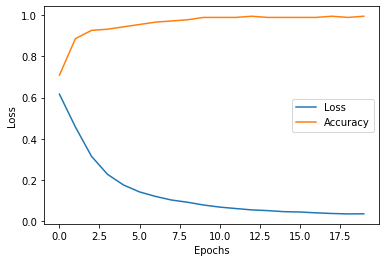

2/2 [==============================] - 0s 998us/step - loss: 0.3120 - accuracy: 0.8857
Epoch 1/20
175/175 [==============================] - 0s 450us/step - loss: 0.6671 - accuracy: 0.5429
Epoch 2/20
175/175 [==============================] - 0s 408us/step - loss: 0.5351 - accuracy: 0.8286
Epoch 3/20
175/175 [==============================] - 0s 410us/step - loss: 0.4424 - accuracy: 0.9029
Epoch 4/20
175/175 [==============================] - 0s 404us/step - loss: 0.3263 - accuracy: 0.9086
Epoch 5/20
175/175 [==============================] - 0s 441us/step - loss: 0.2540 - accuracy: 0.9143
Epoch 6/20
175/175 [==============================] - 0s 418us/step - loss: 0.2094 - accuracy: 0.9257
Epoch 7/20
175/175 [==============================] - 0s 414us/step - loss: 0.1823 - accuracy: 0.9429
Epoch 8/20
175/175 [==============================] - 0s 406us/step - loss: 0.1573 - accuracy: 0.9486
Epoch 9/20
175/175 [==============================] - 0s 471us/step - loss: 0.1358 - accuracy: 0.

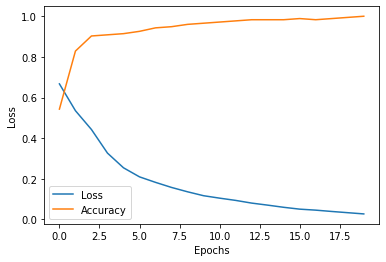

2/2 [==============================] - 0s 510us/step - loss: 0.5934 - accuracy: 0.8857
Epoch 1/20
175/175 [==============================] - 0s 421us/step - loss: 0.6516 - accuracy: 0.6343
Epoch 2/20
175/175 [==============================] - 0s 396us/step - loss: 0.4846 - accuracy: 0.7943
Epoch 3/20
175/175 [==============================] - 0s 412us/step - loss: 0.3956 - accuracy: 0.8400
Epoch 4/20
175/175 [==============================] - 0s 404us/step - loss: 0.3256 - accuracy: 0.8800
Epoch 5/20
175/175 [==============================] - 0s 403us/step - loss: 0.2732 - accuracy: 0.9029
Epoch 6/20
175/175 [==============================] - 0s 400us/step - loss: 0.2410 - accuracy: 0.9029
Epoch 7/20
175/175 [==============================] - 0s 412us/step - loss: 0.2095 - accuracy: 0.9143
Epoch 8/20
175/175 [==============================] - 0s 389us/step - loss: 0.1924 - accuracy: 0.9200
Epoch 9/20
175/175 [==============================] - 0s 409us/step - loss: 0.1735 - accuracy: 0.

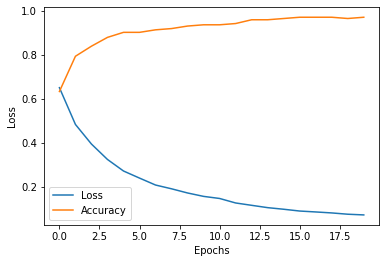

2/2 [==============================] - 0s 0s/step - loss: 0.0685 - accuracy: 0.9714
Epoch 1/20
175/175 [==============================] - 0s 469us/step - loss: 0.5642 - accuracy: 0.7486
Epoch 2/20
175/175 [==============================] - 0s 434us/step - loss: 0.3761 - accuracy: 0.8743
Epoch 3/20
175/175 [==============================] - 0s 410us/step - loss: 0.3038 - accuracy: 0.9086
Epoch 4/20
175/175 [==============================] - 0s 424us/step - loss: 0.2593 - accuracy: 0.9029
Epoch 5/20
175/175 [==============================] - 0s 404us/step - loss: 0.2298 - accuracy: 0.9257
Epoch 6/20
175/175 [==============================] - 0s 404us/step - loss: 0.2050 - accuracy: 0.9371
Epoch 7/20
175/175 [==============================] - 0s 421us/step - loss: 0.1842 - accuracy: 0.9371
Epoch 8/20
175/175 [==============================] - 0s 412us/step - loss: 0.1652 - accuracy: 0.9429
Epoch 9/20
175/175 [==============================] - 0s 419us/step - loss: 0.1501 - accuracy: 0.954

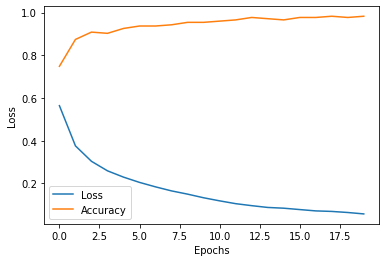

2/2 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.8286
Epoch 1/20
175/175 [==============================] - 0s 487us/step - loss: 0.5195 - accuracy: 0.7714
Epoch 2/20
175/175 [==============================] - 0s 427us/step - loss: 0.3411 - accuracy: 0.8629
Epoch 3/20
175/175 [==============================] - 0s 484us/step - loss: 0.2743 - accuracy: 0.8914
Epoch 4/20
175/175 [==============================] - 0s 604us/step - loss: 0.2337 - accuracy: 0.9029
Epoch 5/20
175/175 [==============================] - 0s 610us/step - loss: 0.2065 - accuracy: 0.9143
Epoch 6/20
175/175 [==============================] - 0s 576us/step - loss: 0.1809 - accuracy: 0.9257
Epoch 7/20
175/175 [==============================] - 0s 641us/step - loss: 0.1586 - accuracy: 0.9257
Epoch 8/20
175/175 [==============================] - 0s 737us/step - loss: 0.1427 - accuracy: 0.9371
Epoch 9/20
175/175 [==============================] - 0s 587us/step - loss: 0.1196 - accuracy: 0.97

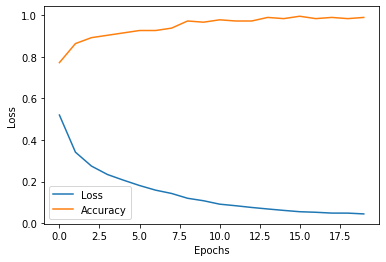

2/2 [==============================] - 0s 0s/step - loss: 0.4925 - accuracy: 0.8857
Epoch 1/20
175/175 [==============================] - 0s 450us/step - loss: 0.6091 - accuracy: 0.6857
Epoch 2/20
175/175 [==============================] - 0s 420us/step - loss: 0.4585 - accuracy: 0.8571
Epoch 3/20
175/175 [==============================] - 0s 486us/step - loss: 0.3566 - accuracy: 0.8914
Epoch 4/20
175/175 [==============================] - 0s 465us/step - loss: 0.2916 - accuracy: 0.9086
Epoch 5/20
175/175 [==============================] - 0s 470us/step - loss: 0.2444 - accuracy: 0.9143
Epoch 6/20
175/175 [==============================] - 0s 468us/step - loss: 0.2124 - accuracy: 0.9257
Epoch 7/20
175/175 [==============================] - 0s 480us/step - loss: 0.1874 - accuracy: 0.9257
Epoch 8/20
175/175 [==============================] - 0s 494us/step - loss: 0.1719 - accuracy: 0.9314
Epoch 9/20
175/175 [==============================] - 0s 498us/step - loss: 0.1510 - accuracy: 0.942

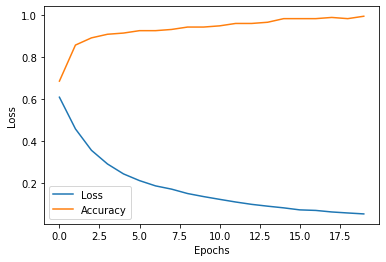

2/2 [==============================] - 0s 0s/step - loss: 0.4208 - accuracy: 0.8857
Epoch 1/20
175/175 [==============================] - 0s 461us/step - loss: 0.7220 - accuracy: 0.5257
Epoch 2/20
175/175 [==============================] - 0s 444us/step - loss: 0.5142 - accuracy: 0.8457
Epoch 3/20
175/175 [==============================] - 0s 443us/step - loss: 0.4068 - accuracy: 0.8743
Epoch 4/20
175/175 [==============================] - 0s 468us/step - loss: 0.3408 - accuracy: 0.8857
Epoch 5/20
175/175 [==============================] - 0s 456us/step - loss: 0.2941 - accuracy: 0.8914
Epoch 6/20
175/175 [==============================] - 0s 462us/step - loss: 0.2588 - accuracy: 0.8971
Epoch 7/20
175/175 [==============================] - 0s 464us/step - loss: 0.2281 - accuracy: 0.9143
Epoch 8/20
175/175 [==============================] - 0s 483us/step - loss: 0.1977 - accuracy: 0.9200
Epoch 9/20
175/175 [==============================] - 0s 495us/step - loss: 0.1757 - accuracy: 0.931

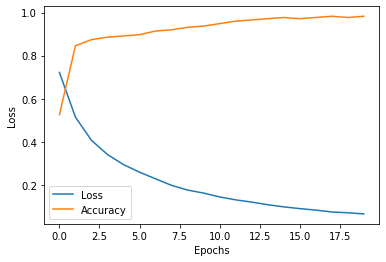

2/2 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9429
Epoch 1/20
175/175 [==============================] - 0s 463us/step - loss: 0.6202 - accuracy: 0.6343
Epoch 2/20
175/175 [==============================] - 0s 401us/step - loss: 0.4429 - accuracy: 0.8514
Epoch 3/20
175/175 [==============================] - 0s 395us/step - loss: 0.3747 - accuracy: 0.8971
Epoch 4/20
175/175 [==============================] - 0s 398us/step - loss: 0.3192 - accuracy: 0.9086
Epoch 5/20
175/175 [==============================] - 0s 404us/step - loss: 0.2625 - accuracy: 0.9143
Epoch 6/20
175/175 [==============================] - 0s 390us/step - loss: 0.2091 - accuracy: 0.9257
Epoch 7/20
175/175 [==============================] - 0s 401us/step - loss: 0.1752 - accuracy: 0.9429
Epoch 8/20
175/175 [==============================] - 0s 401us/step - loss: 0.1536 - accuracy: 0.9543
Epoch 9/20
175/175 [==============================] - 0s 400us/step - loss: 0.1358 - accuracy: 0.95

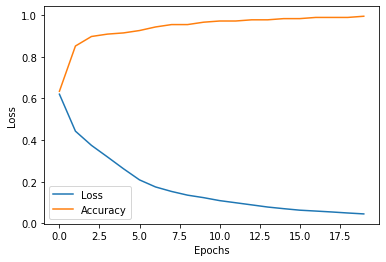

2/2 [==============================] - 0s 0s/step - loss: 0.3315 - accuracy: 0.9143
Epoch 1/20
175/175 [==============================] - 0s 512us/step - loss: 0.6268 - accuracy: 0.6686
Epoch 2/20
175/175 [==============================] - 0s 397us/step - loss: 0.4749 - accuracy: 0.8171
Epoch 3/20
175/175 [==============================] - 0s 416us/step - loss: 0.3771 - accuracy: 0.8629
Epoch 4/20
175/175 [==============================] - 0s 416us/step - loss: 0.3136 - accuracy: 0.8857
Epoch 5/20
175/175 [==============================] - 0s 421us/step - loss: 0.2576 - accuracy: 0.9029
Epoch 6/20
175/175 [==============================] - 0s 413us/step - loss: 0.2137 - accuracy: 0.9257
Epoch 7/20
175/175 [==============================] - 0s 417us/step - loss: 0.1865 - accuracy: 0.9371
Epoch 8/20
175/175 [==============================] - 0s 450us/step - loss: 0.1628 - accuracy: 0.9371
Epoch 9/20
175/175 [==============================] - 0s 436us/step - loss: 0.1490 - accuracy: 0.948

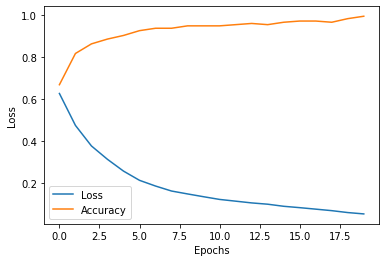

2/2 [==============================] - 0s 500us/step - loss: 0.3956 - accuracy: 0.8571
Epoch 1/20
175/175 [==============================] - 0s 427us/step - loss: 0.7867 - accuracy: 0.4343
Epoch 2/20
175/175 [==============================] - 0s 428us/step - loss: 0.5079 - accuracy: 0.8800
Epoch 3/20
175/175 [==============================] - 0s 445us/step - loss: 0.3698 - accuracy: 0.9029
Epoch 4/20
175/175 [==============================] - 0s 459us/step - loss: 0.2638 - accuracy: 0.9257
Epoch 5/20
175/175 [==============================] - 0s 454us/step - loss: 0.2114 - accuracy: 0.9200
Epoch 6/20
175/175 [==============================] - 0s 460us/step - loss: 0.1677 - accuracy: 0.9543
Epoch 7/20
175/175 [==============================] - 0s 485us/step - loss: 0.1426 - accuracy: 0.9543
Epoch 8/20
175/175 [==============================] - 0s 494us/step - loss: 0.1211 - accuracy: 0.9657
Epoch 9/20
175/175 [==============================] - 0s 538us/step - loss: 0.1065 - accuracy: 0.

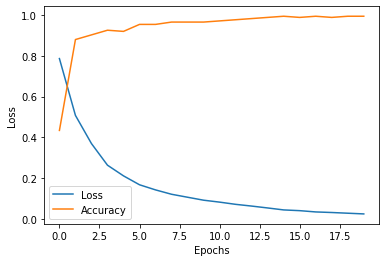

2/2 [==============================] - 0s 187us/step - loss: 1.0787 - accuracy: 0.8000
Epoch 1/20
175/175 [==============================] - 0s 457us/step - loss: 0.6731 - accuracy: 0.6571
Epoch 2/20
175/175 [==============================] - 0s 440us/step - loss: 0.4710 - accuracy: 0.8629
Epoch 3/20
175/175 [==============================] - 0s 445us/step - loss: 0.3667 - accuracy: 0.8971
Epoch 4/20
175/175 [==============================] - 0s 454us/step - loss: 0.2822 - accuracy: 0.9086
Epoch 5/20
175/175 [==============================] - 0s 465us/step - loss: 0.2210 - accuracy: 0.9371
Epoch 6/20
175/175 [==============================] - 0s 508us/step - loss: 0.1772 - accuracy: 0.9600
Epoch 7/20
175/175 [==============================] - 0s 591us/step - loss: 0.1482 - accuracy: 0.9543
Epoch 8/20
175/175 [==============================] - 0s 551us/step - loss: 0.1279 - accuracy: 0.9543
Epoch 9/20
175/175 [==============================] - 0s 496us/step - loss: 0.1118 - accuracy: 0.

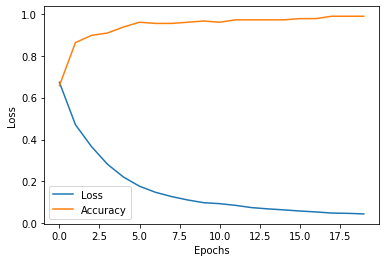

2/2 [==============================] - 0s 0s/step - loss: 0.3748 - accuracy: 0.8857


In [2115]:
for train_index, test_index in rkf.split(features_trainval_scaled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    features_trainval_train , features_trainval_test = features_trainval_scaled[train_index],features_trainval_scaled[test_index]
    label_trainval_train , label_trainval_test = label_trainval[train_index] , label_trainval[test_index]
    model = build_model()
    history = model.fit(features_trainval_train, label_trainval_train, epochs=20, batch_size=1)
    history_dict = history.history
    history_plot(history_dict)
    val_loss, val_accuracy = model.evaluate(features_trainval_test, label_trainval_test)
    all_scores_loss.append(val_loss)
    all_scores_accuracy.append(val_accuracy)

In [2116]:
all_scores_loss

[0.19432182610034943,
 0.6688984632492065,
 0.4279697835445404,
 0.4691137671470642,
 0.22914889454841614,
 0.5086943507194519,
 0.15891294181346893,
 0.31200727820396423,
 0.5934328436851501,
 0.06846664100885391,
 0.47053200006484985,
 0.4924860894680023,
 0.4208008944988251,
 0.11515296995639801,
 0.3314816653728485,
 0.39563000202178955,
 1.078678011894226,
 0.37482431530952454]

In [2117]:
all_scores_accuracy

[0.8857142925262451,
 0.800000011920929,
 0.8857142925262451,
 0.8285714387893677,
 0.9142857193946838,
 0.8571428656578064,
 0.9428571462631226,
 0.8857142925262451,
 0.8857142925262451,
 0.9714285731315613,
 0.8285714387893677,
 0.8857142925262451,
 0.8857142925262451,
 0.9428571462631226,
 0.9142857193946838,
 0.8571428656578064,
 0.800000011920929,
 0.8857142925262451]

In [2118]:
np.mean(all_scores_accuracy)

0.880952388048172

In [2119]:
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [2120]:
#features_test_scaled = min_max_scaler.fit_transform(features_test)

In [2121]:
#val_loss, val_accuracy = model.evaluate(features_test_scaled, label_test )